In [3]:
%load_ext autoreload
%autoreload 2

# import libraries
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pyshtools as pysh
import SLmod as SL
import RFmod as RF
from numpy import pi as pi


#set plotting parameters
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = [16, 8]
                                  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# get values for some physical parameters
b = SL.b
g = SL.g
G = SL.G
rhoi = SL.rhoi
rhow = SL.rhow
rhos = SL.rhos

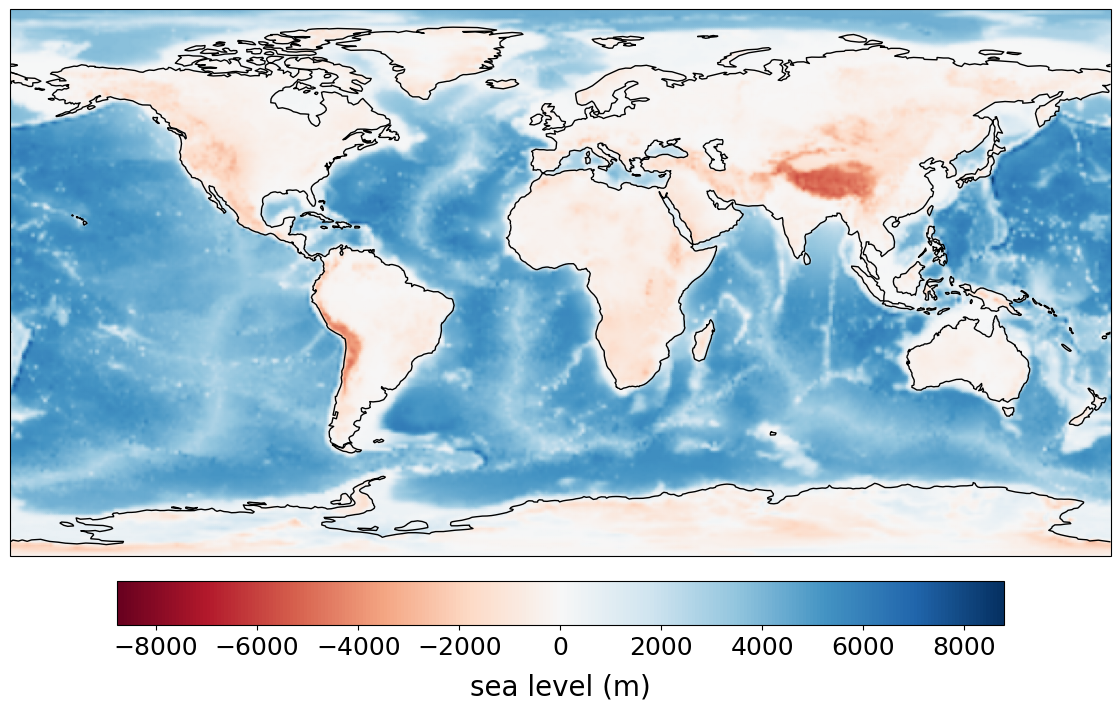

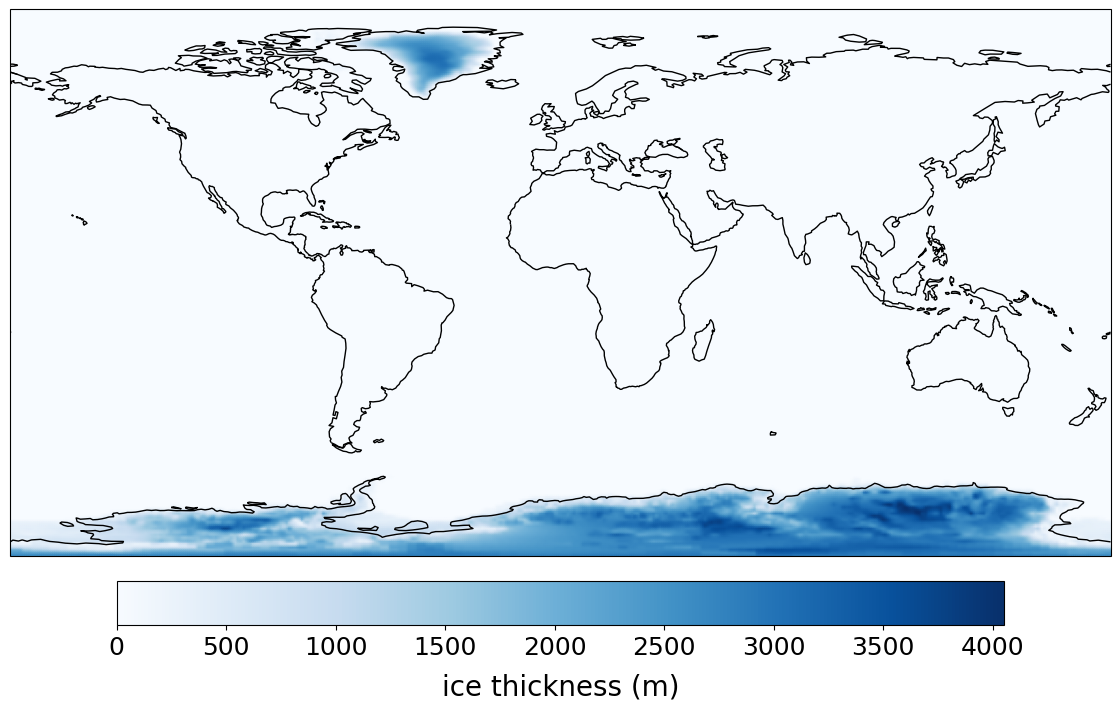

In [5]:
# set the truncation degree
L=256

# read in the present day sea level and ice thickness
sl0,ice0 = SL.get_sl_ice_data(L)

# plot these fields
SL.plot(sl0,label = 'sea level (m)')
SL.plot(ice0,label = 'ice thickness (m)',clim_pos = True)

# compute the ocean function
C = SL.ocean_function(sl0,ice0)

# get the ocean mask
ocean_mask = SL.ocean_mask(sl0,ice0)

# get the ice mask
ice_mask = SL.ice_mask(sl0,ice0)

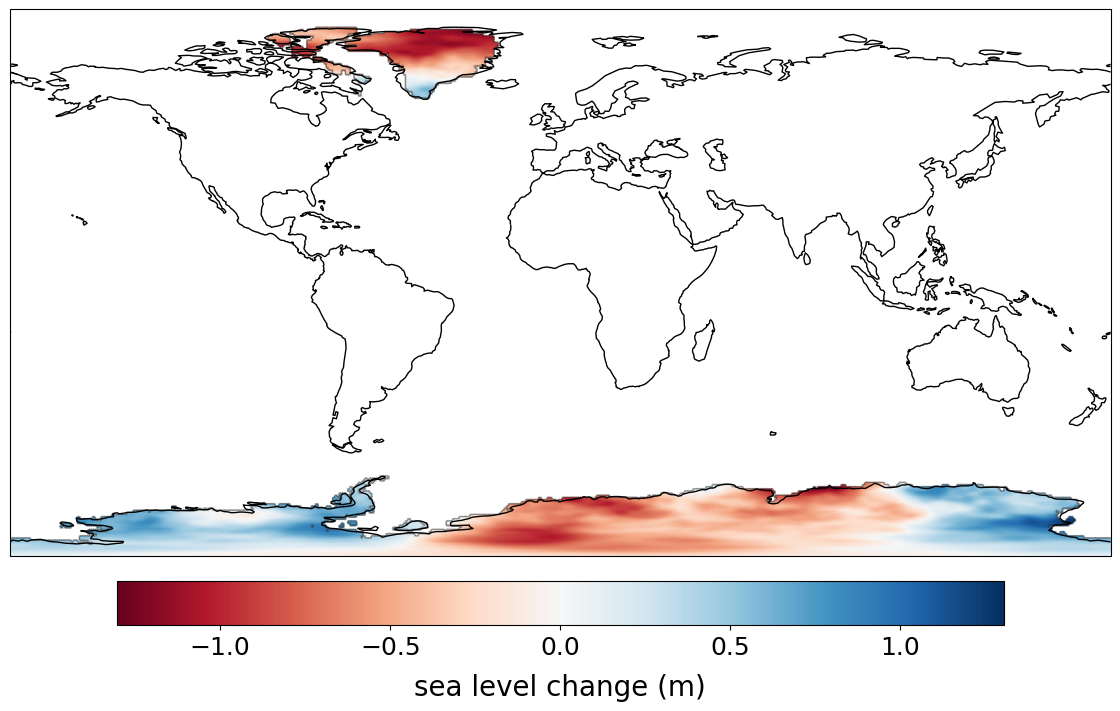

iteration =  1 relative change =  0.02855145789837957
iteration =  2 relative change =  0.004026987223188878
iteration =  3 relative change =  0.0009382806672972075
iteration =  4 relative change =  0.00023439283632260927
iteration =  5 relative change =  5.999632351862718e-05
iteration =  6 relative change =  1.5788240969150424e-05
iteration =  7 relative change =  4.281714637693996e-06
iteration =  8 relative change =  1.1971381324336573e-06
iteration =  9 relative change =  3.445597025845082e-07
iteration =  10 relative change =  1.0176121615085029e-07
iteration =  11 relative change =  3.071903572794313e-08
iteration =  12 relative change =  9.440598451335753e-09


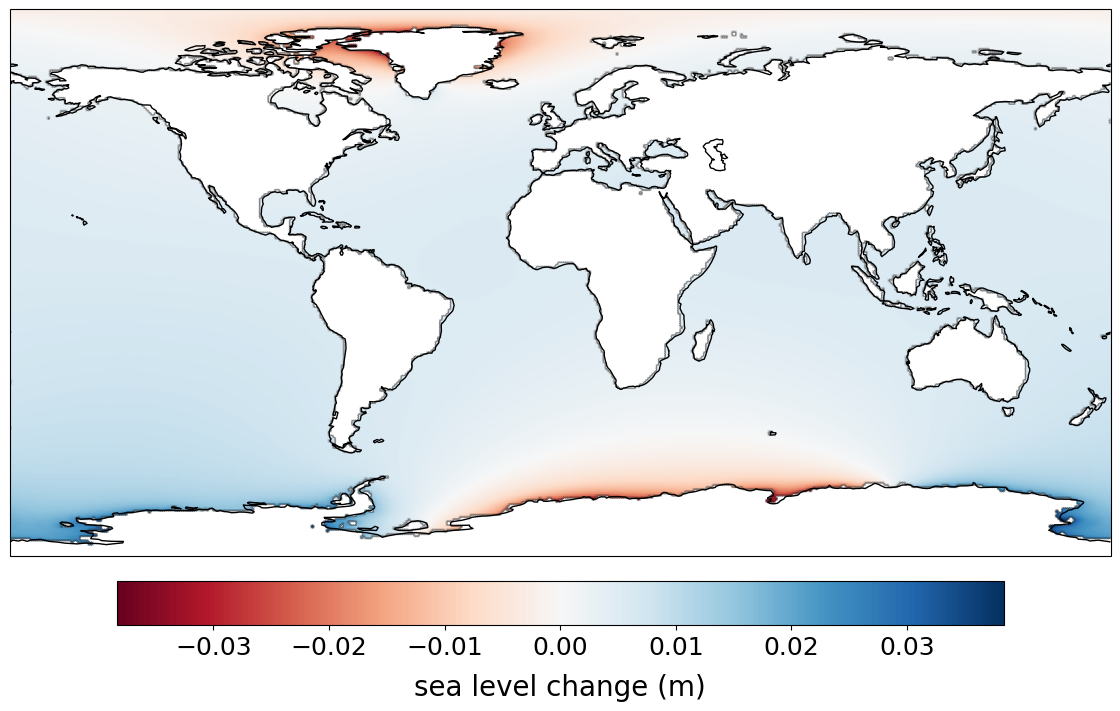

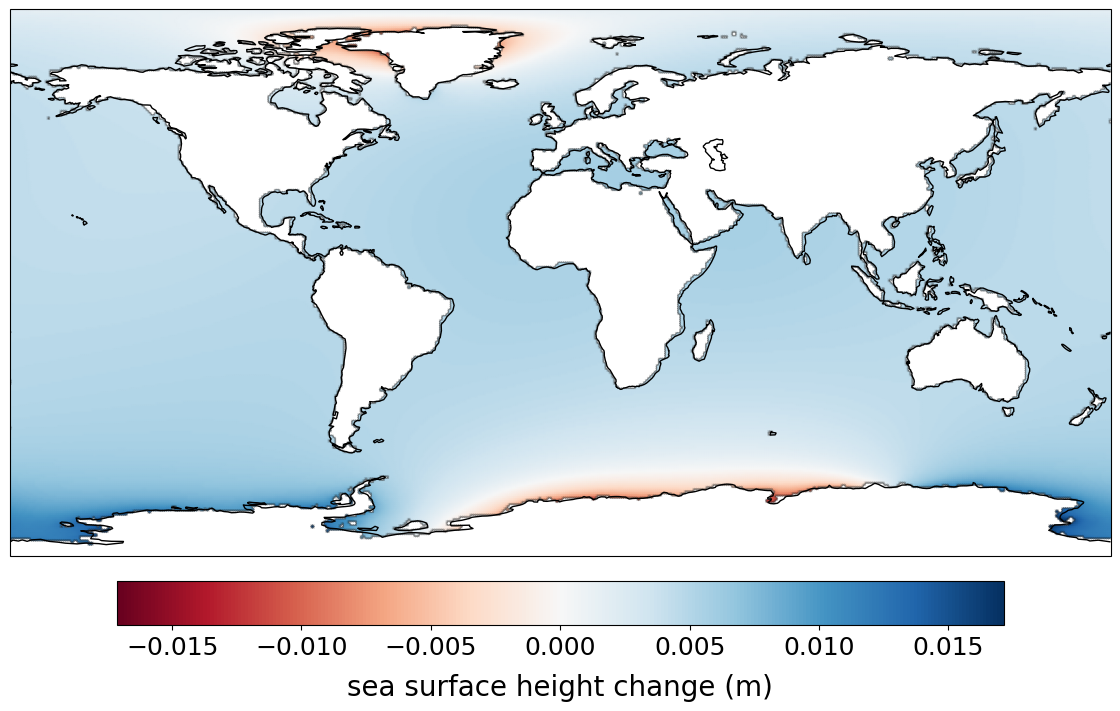

In [6]:
# Set the covariance for the random field
Q = RF.sobolev_covariance(L,s = 2,mu = 0.2, b = b)

# Generate the random ice model
zeta = -rhoi*SL.random_ice_model(sl0,ice0,Q,b = b)

# Scale the load to a given value of \Delta GMSL
GMSL = 0.005
zeta = GMSL * zeta / SL.bathtub(C,zeta)

# plot the change in ice thickness
SL.plot(ice_mask*zeta / rhoi,label = r'sea level change (m)')

# Solve the sea level equation
sl,u,phi,om,psi = SL.fingerprint(C,zeta)

# plot the result
SL.plot(ocean_mask*sl,label = r'sea level change (m)')

# Compute and plot the sea surface height change
ssh = sl + u + psi/SL.g
SL.plot(ocean_mask*ssh,label = r'sea surface height change (m)')


iteration =  1 relative change =  0.03808570872180669
iteration =  2 relative change =  0.005442969012800666
iteration =  3 relative change =  0.0011180535733125781
iteration =  4 relative change =  0.00025792135520470597
iteration =  5 relative change =  6.379151444139457e-05
iteration =  6 relative change =  1.6807492205434613e-05
iteration =  7 relative change =  4.568695884468054e-06
iteration =  8 relative change =  1.2811279158749616e-06
iteration =  9 relative change =  3.697943230576421e-07
iteration =  10 relative change =  1.0949252391912984e-07
iteration =  11 relative change =  3.3119737252130613e-08
iteration =  12 relative change =  1.0190335388890226e-08
iteration =  13 relative change =  3.177237543699424e-09


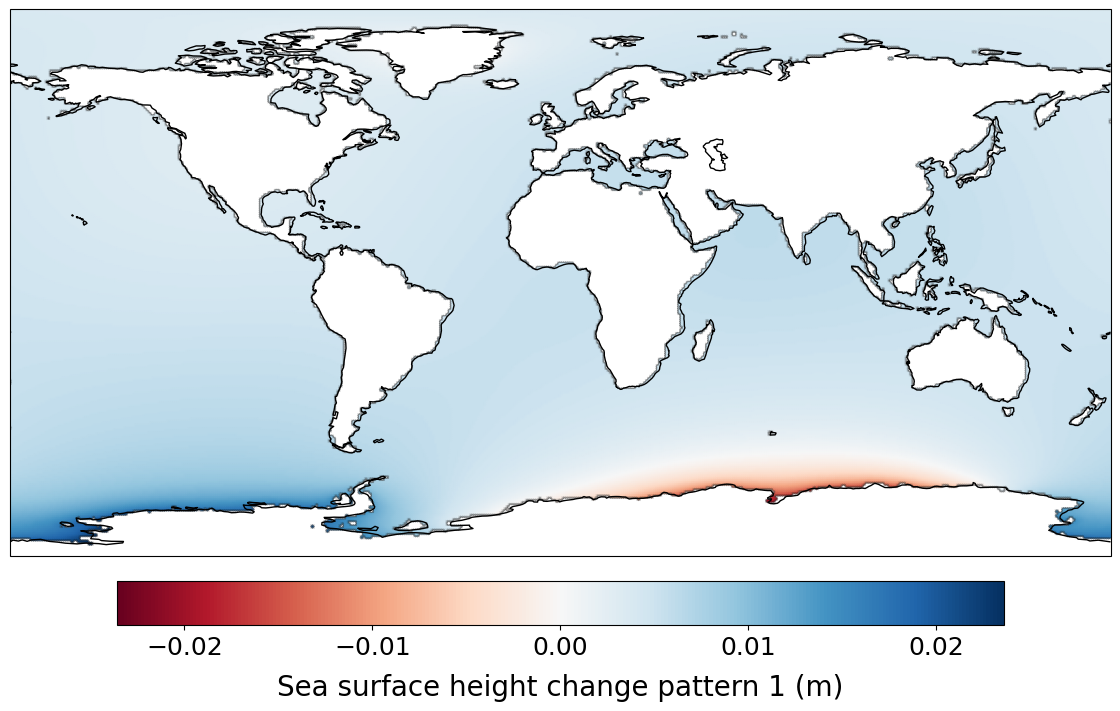

iteration =  1 relative change =  0.04100535891264225
iteration =  2 relative change =  0.00537075750044374
iteration =  3 relative change =  0.000997278508576416
iteration =  4 relative change =  0.000211638653346981
iteration =  5 relative change =  4.856905551294007e-05
iteration =  6 relative change =  1.1828902324825675e-05
iteration =  7 relative change =  3.0377270503031842e-06
iteration =  8 relative change =  8.192271847424976e-07
iteration =  9 relative change =  2.3075090423232033e-07
iteration =  10 relative change =  6.744950472295632e-08
iteration =  11 relative change =  2.0282294923556104e-08
iteration =  12 relative change =  6.232157665204828e-09


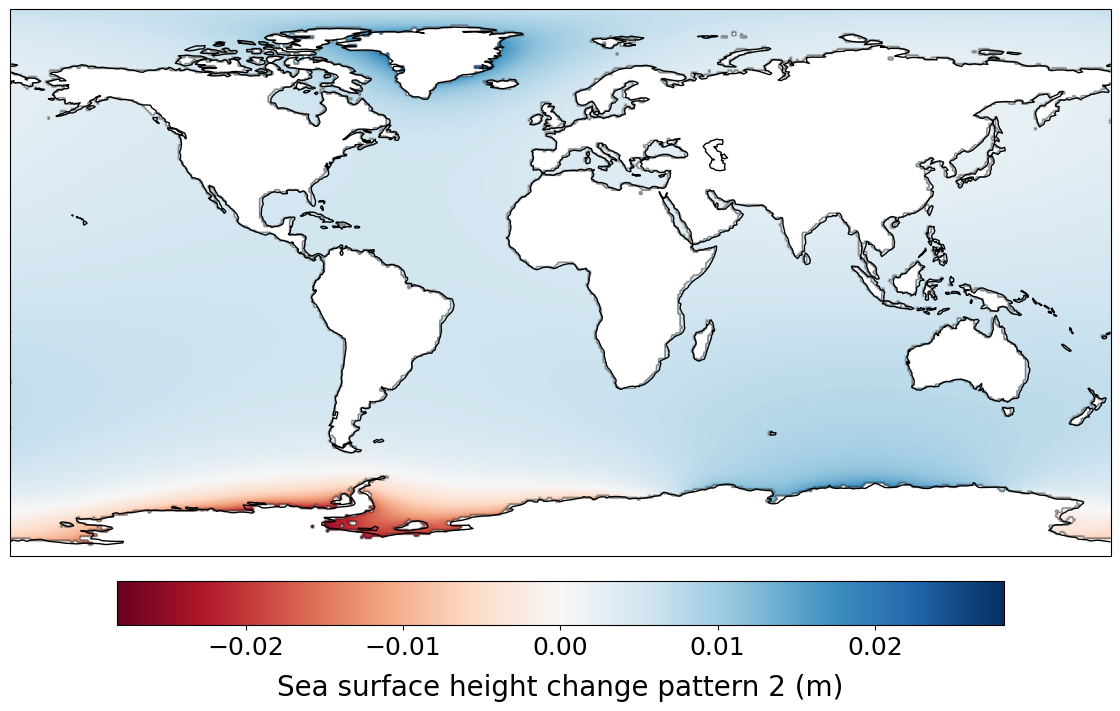

iteration =  1 relative change =  0.05174735780045316
iteration =  2 relative change =  0.0063058110764267145
iteration =  3 relative change =  0.0010690764316231107
iteration =  4 relative change =  0.0002105985835768098
iteration =  5 relative change =  4.5181950026503585e-05
iteration =  6 relative change =  1.0374539449159217e-05
iteration =  7 relative change =  2.5394090486562506e-06
iteration =  8 relative change =  6.605181872911041e-07
iteration =  9 relative change =  1.8149777981068138e-07
iteration =  10 relative change =  5.2236846332833474e-08
iteration =  11 relative change =  1.5587022730317336e-08
iteration =  12 relative change =  4.77584674201136e-09


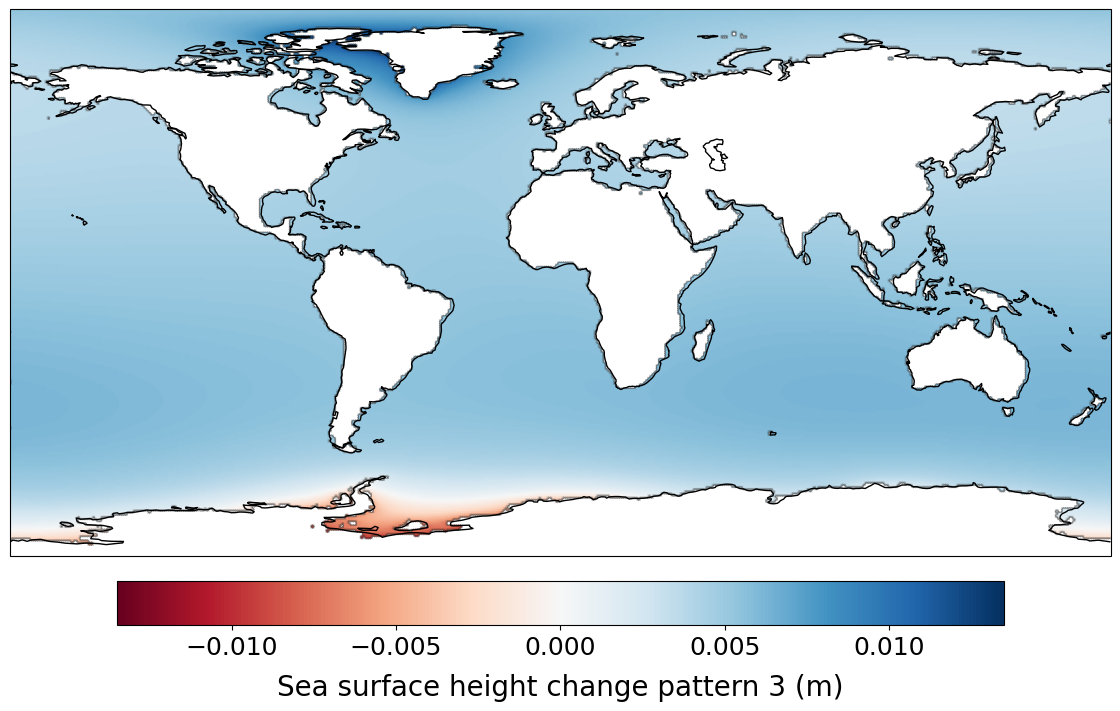

iteration =  1 relative change =  0.03735075999262674
iteration =  2 relative change =  0.005037734674489131
iteration =  3 relative change =  0.0009352934977027107
iteration =  4 relative change =  0.00019642244186718154
iteration =  5 relative change =  4.465080072858597e-05
iteration =  6 relative change =  1.0763597554241201e-05
iteration =  7 relative change =  2.7246685002692756e-06
iteration =  8 relative change =  7.213920061144632e-07
iteration =  9 relative change =  1.9911186502448963e-07
iteration =  10 relative change =  5.699430739868062e-08
iteration =  11 relative change =  1.740359082532702e-08
iteration =  12 relative change =  5.399387659938852e-09


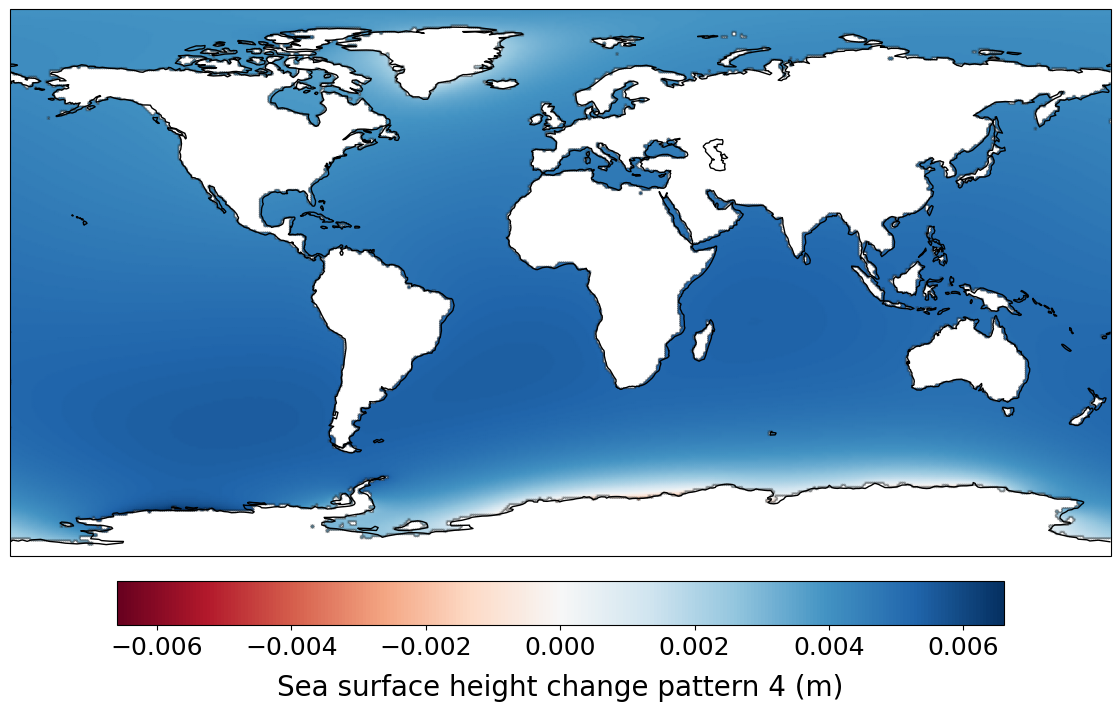

iteration =  1 relative change =  0.03118885431939937
iteration =  2 relative change =  0.003963853044816204
iteration =  3 relative change =  0.0006829996103483485
iteration =  4 relative change =  0.0001364137390337192
iteration =  5 relative change =  2.972623186611374e-05
iteration =  6 relative change =  6.9221108448078485e-06
iteration =  7 relative change =  1.7088987023753917e-06
iteration =  8 relative change =  4.4517383263083344e-07
iteration =  9 relative change =  1.217811601200307e-07
iteration =  10 relative change =  3.6882662338252514e-08
iteration =  11 relative change =  1.1343799591374246e-08
iteration =  12 relative change =  3.5326410047464184e-09


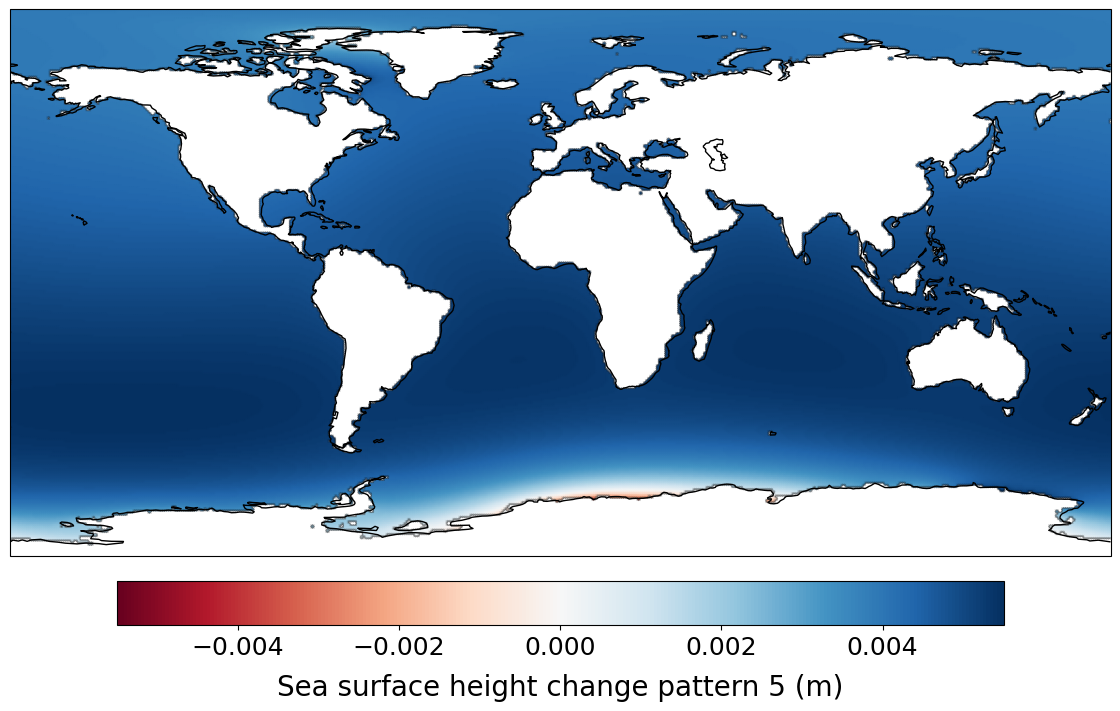

In [1]:
%load_ext autoreload
%autoreload 2

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pyshtools as pysh
import SLmod as SL
import RFmod as RF
from numpy import pi as pi

# Set plotting parameters
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
font = {'size': 20}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = [16, 8]

# Get values for some physical parameters
b = SL.b
g = SL.g
G = SL.G
rhoi = SL.rhoi
rhow = SL.rhow
rhos = SL.rhos

# Set the truncation degree
L = 256

# Read in the present day sea level and ice thickness
sl0, ice0 = SL.get_sl_ice_data(L)

# Compute the ocean function
C = SL.ocean_function(sl0, ice0)

# Get the ocean and ice masks
ocean_mask = SL.ocean_mask(sl0, ice0)
ice_mask = SL.ice_mask(sl0, ice0)

# Set the covariance for the random field
Q = RF.sobolev_covariance(L, s=2, mu=0.2, b=b)

# Set the number of random patterns to generate
num_random_patterns = 5

# Loop through the number of random patterns
for i in range(num_random_patterns):
    # Generate the random ice model
    zeta = -rhoi * SL.random_ice_model(sl0, ice0, Q, b=b)

    # Scale the load to a given value of \Delta GMSL
    GMSL = 0.005
    zeta = GMSL * zeta / SL.bathtub(C, zeta)

    # Solve the sea level equation
    sl, u, phi, om, psi = SL.fingerprint(C, zeta)

    # Compute and plot the sea surface height change
    ssh = sl + u + psi / g
    SL.plot(ocean_mask * ssh, label=f'Sea surface height change pattern {i+1} (m)')

    # Show the plot for the current iteration
    plt.show()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
iteration =  1 relative change =  0.05007144155588331
iteration =  2 relative change =  0.006241196419669582
iteration =  3 relative change =  0.0010927604562656304
iteration =  4 relative change =  0.00022142184024173057
iteration =  5 relative change =  4.85727514455209e-05
iteration =  6 relative change =  1.1369462935994364e-05
iteration =  7 relative change =  2.828309063425299e-06
iteration =  8 relative change =  7.456734051970126e-07
iteration =  9 relative change =  2.0703287956585677e-07
iteration =  10 relative change =  6.001442869822338e-08
iteration =  11 relative change =  1.7985890418476377e-08
iteration =  12 relative change =  5.524946547340486e-09


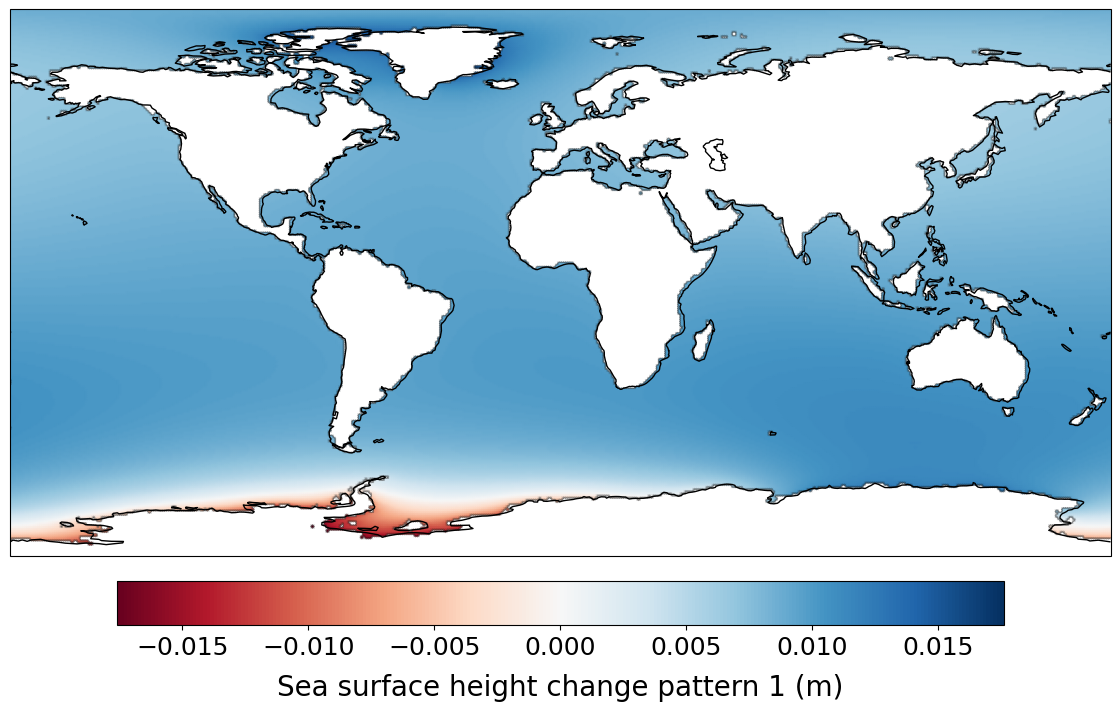

iteration =  1 relative change =  0.0586104879602209
iteration =  2 relative change =  0.007043996099134431
iteration =  3 relative change =  0.0011332449362145536
iteration =  4 relative change =  0.00021163322681399434
iteration =  5 relative change =  4.3590396966564154e-05
iteration =  6 relative change =  9.741165533506933e-06
iteration =  7 relative change =  2.3665432234863696e-06
iteration =  8 relative change =  6.038305264193406e-07
iteration =  9 relative change =  1.6454179208754507e-07
iteration =  10 relative change =  4.705878202945097e-08
iteration =  11 relative change =  1.3969770955239391e-08
iteration =  12 relative change =  4.261284907855611e-09


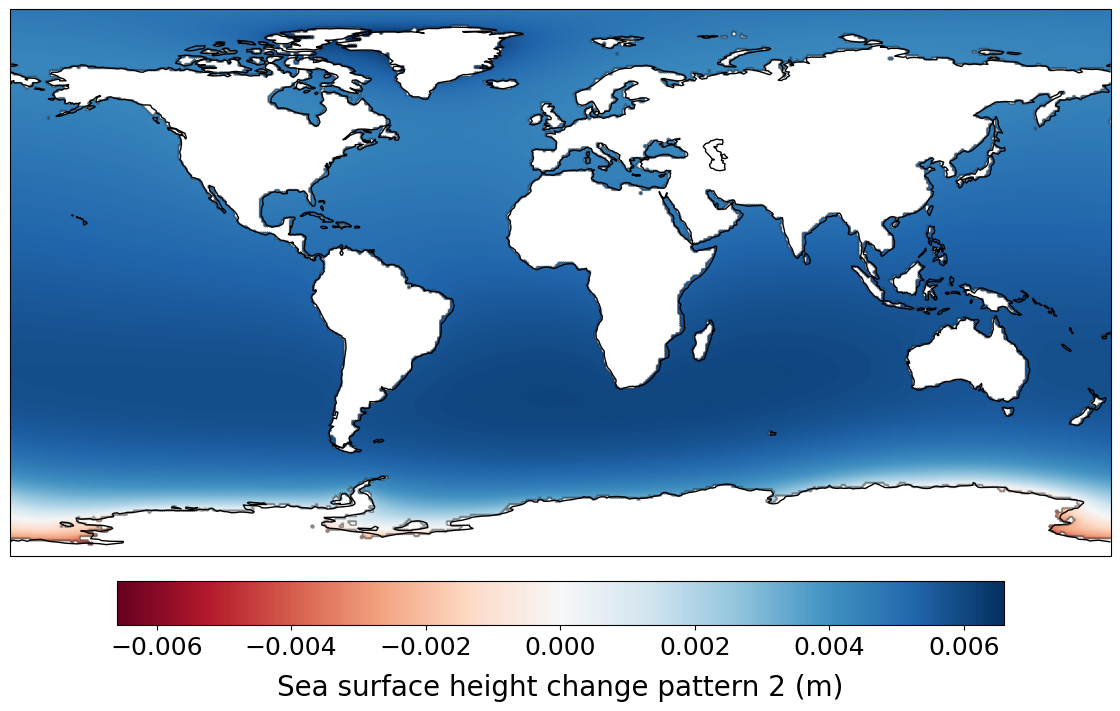

iteration =  1 relative change =  0.023204630427948816
iteration =  2 relative change =  0.002368423661018904
iteration =  3 relative change =  0.00038816063620257025
iteration =  4 relative change =  7.626657722284887e-05
iteration =  5 relative change =  1.65135418092892e-05
iteration =  6 relative change =  3.814680390675693e-06
iteration =  7 relative change =  9.29400857089817e-07
iteration =  8 relative change =  2.3801080921363309e-07
iteration =  9 relative change =  6.39384931090072e-08
iteration =  10 relative change =  1.7950818724106352e-08
iteration =  11 relative change =  5.233693174015142e-09


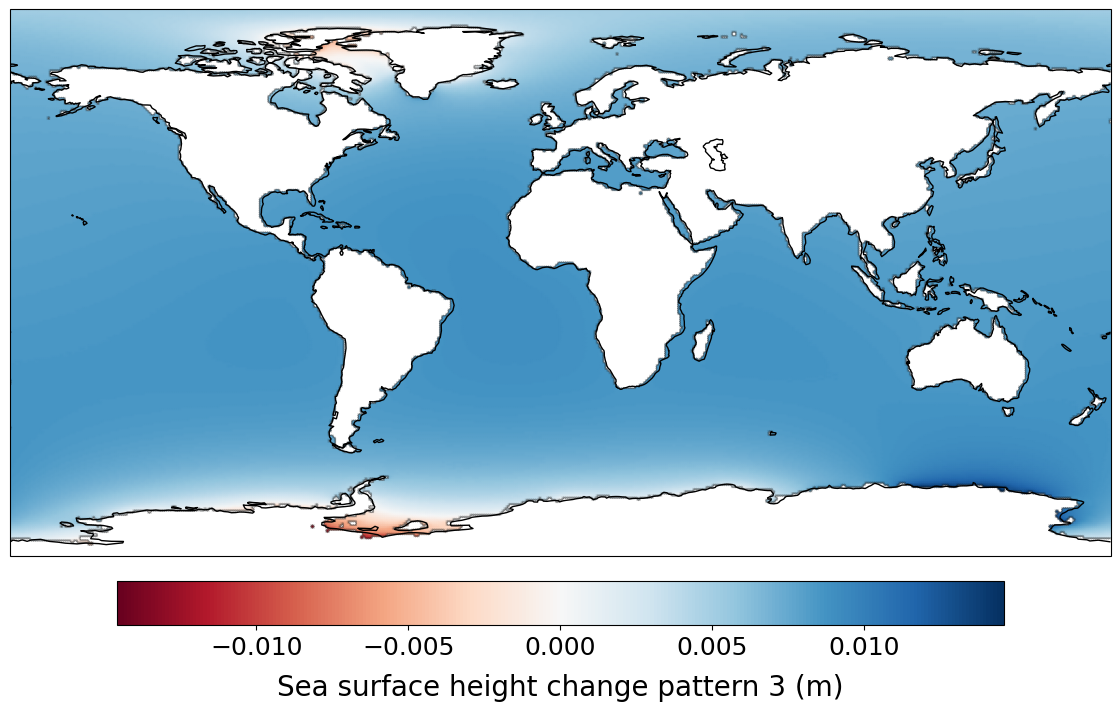

iteration =  1 relative change =  0.039211835446607654
iteration =  2 relative change =  0.005203230006236049
iteration =  3 relative change =  0.0009751986506579924
iteration =  4 relative change =  0.0002103715934806222
iteration =  5 relative change =  4.89353555312524e-05
iteration =  6 relative change =  1.2058396144276298e-05
iteration =  7 relative change =  3.1573896685921656e-06
iteration =  8 relative change =  9.069757818172939e-07
iteration =  9 relative change =  2.666801391177317e-07
iteration =  10 relative change =  8.00663148298373e-08
iteration =  11 relative change =  2.4473240277163187e-08
iteration =  12 relative change =  7.589264266658466e-09


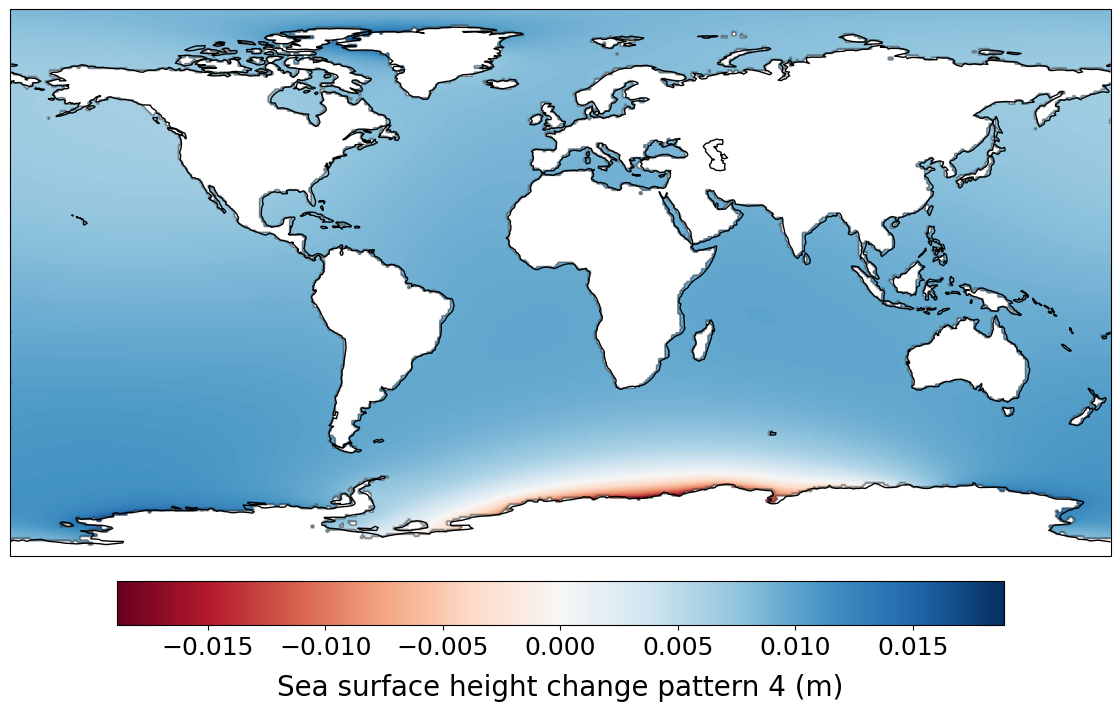

iteration =  1 relative change =  0.03201579039942954
iteration =  2 relative change =  0.004327937690230596
iteration =  3 relative change =  0.000912899311233876
iteration =  4 relative change =  0.000214231794643772
iteration =  5 relative change =  5.275212348752018e-05
iteration =  6 relative change =  1.3530532071300299e-05
iteration =  7 relative change =  3.6095691732669852e-06
iteration =  8 relative change =  9.998800070168862e-07
iteration =  9 relative change =  2.865836793337027e-07
iteration =  10 relative change =  8.45747722424067e-08
iteration =  11 relative change =  2.5556340950683585e-08
iteration =  12 relative change =  7.865835984017853e-09


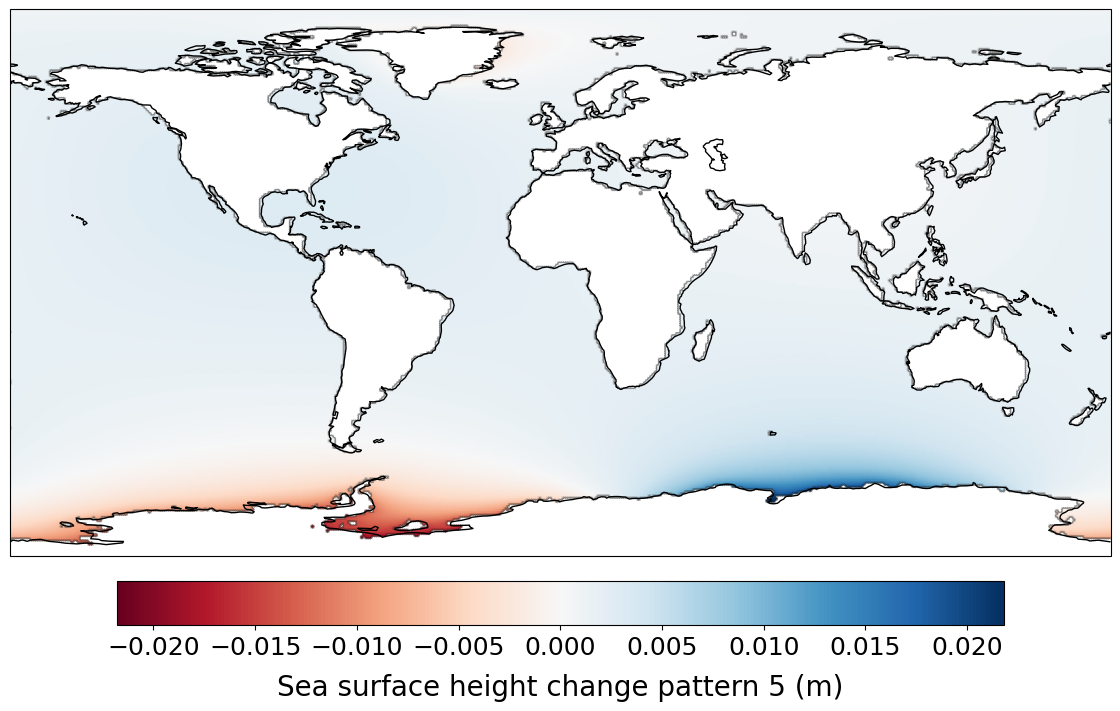

In [2]:
%load_ext autoreload
%autoreload 2

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pyshtools as pysh
import SLmod as SL
import RFmod as RF
from numpy import pi as pi

# Set plotting parameters
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
font = {'size': 20}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = [16, 8]

# Get values for some physical parameters
b = SL.b
g = SL.g
G = SL.G
rhoi = SL.rhoi
rhow = SL.rhow
rhos = SL.rhos

# Set the truncation degree
L = 256

# Read in the present day sea level and ice thickness
sl0, ice0 = SL.get_sl_ice_data(L)

# Compute the ocean function
C = SL.ocean_function(sl0, ice0)

# Get the ocean and ice masks
ocean_mask = SL.ocean_mask(sl0, ice0)
ice_mask = SL.ice_mask(sl0, ice0)

# Set the covariance for the random field
Q = RF.sobolev_covariance(L, s=2, mu=0.2, b=b)

# Set the number of random patterns to generate
num_random_patterns = 5

# Loop through the number of random patterns
for i in range(num_random_patterns):
    # Randomize the parameters controlling the random field, if desired
    # For example, you can randomize the smoothness parameter s or the correlation length mu
    random_s = np.random.uniform(1, 3)  # Randomly choose s between 1 and 3
    random_mu = np.random.uniform(0.1, 0.5)  # Randomly choose mu between 0.1 and 0.5

    # Update the covariance for the random field with the new random parameters
    Q = RF.sobolev_covariance(L, s=random_s, mu=random_mu, b=b)

    # Generate the random ice model with the new random parameters
    zeta = -rhoi * SL.random_ice_model(sl0, ice0, Q, b=b)

    # You could also randomize the GMSL change
    random_GMSL = np.random.uniform(0.001, 0.010)  # Randomly choose GMSL between 0.001 and 0.010 meters

    # Scale the load to the randomly chosen value of \Delta GMSL
    zeta = random_GMSL * zeta / SL.bathtub(C, zeta)

    # Solve the sea level equation
    sl, u, phi, om, psi = SL.fingerprint(C, zeta)

    # Compute and plot the sea surface height change
    ssh = sl + u + psi / g
    SL.plot(ocean_mask * ssh, label=f'Sea surface height change pattern {i+1} (m)')

    # Show the plot for the current iteration
    plt.show()
